In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Loading dataset**

In [4]:
data=pd.read_csv('/content/titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X = data[['Pclass','SibSp','Parch','Fare']]
y = data.Survived

In [10]:
X.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


# **Logistic Regression**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [13]:
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7039106145251397
Confusion Matrix:
 [[95 19]
 [34 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       114
           1       0.62      0.48      0.54        65

    accuracy                           0.70       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.69      0.70      0.69       179



*KFold cross validation to generalise model accuracy*

In [14]:
model = LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.62569832 0.66853933 0.66853933 0.69662921 0.75280899]

Average of Cross Validation Scores: 0.6824430355909861


# **KNN**

In [16]:
acc_val=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

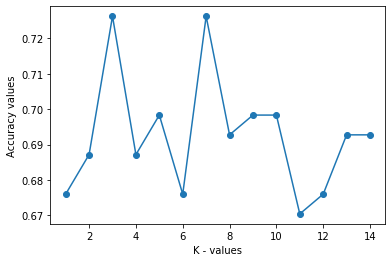

In [18]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [21]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train,y_train)

y_pred = model_knn.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6703910614525139
Confusion Matrix:
 [[90 24]
 [35 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       114
           1       0.56      0.46      0.50        65

    accuracy                           0.67       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.66      0.67      0.66       179



*KFold cross validation to generalise model accuracy*

In [22]:
kf=KFold(n_splits=5)
score=cross_val_score(model_knn,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.60893855 0.59550562 0.65168539 0.73033708 0.74157303]

Average of Cross Validation Scores: 0.6656079342163078


# **SVM**

In [24]:
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7094972067039106
Confusion Matrix:
 [[95 19]
 [33 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79       114
           1       0.63      0.49      0.55        65

    accuracy                           0.71       179
   macro avg       0.68      0.66      0.67       179
weighted avg       0.70      0.71      0.70       179



*KFold cross validation to generalise model accuracy*

In [25]:
kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.61452514 0.65730337 0.66292135 0.7247191  0.74719101]

Average of Cross Validation Scores: 0.6813319942250958


# **Decision Tree**

In [28]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.6871508379888268
Confusion Matrix:
 [[93 21]
 [35 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       114
           1       0.59      0.46      0.52        65

    accuracy                           0.69       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.68      0.69      0.68       179



*KFold cross validation to generalise model accuracy*

In [29]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.68156425 0.63483146 0.69662921 0.70224719 0.7247191 ]

Average of Cross Validation Scores: 0.6879982424204382


# **Random Forest**

In [32]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf_clf.fit(X_test,y_test)

y_pred = rf_clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.9106145251396648
Confusion Matrix:
 [[113   1]
 [ 15  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       114
           1       0.98      0.77      0.86        65

    accuracy                           0.91       179
   macro avg       0.93      0.88      0.90       179
weighted avg       0.92      0.91      0.91       179



*KFold cross validation to generalise model accuracy*

In [34]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
rf_clf.fit(X_test,y_test)

y_pred = rf_clf.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.9106145251396648
Confusion Matrix:
 [[113   1]
 [ 15  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       114
           1       0.98      0.77      0.86        65

    accuracy                           0.91       179
   macro avg       0.93      0.88      0.90       179
weighted avg       0.92      0.91      0.91       179



*KFold cross validation to generalise model accuracy*

In [35]:
from sklearn.model_selection import cross_val_score,KFold

rf_clf = RandomForestClassifier(random_state=42, n_estimators = 100)
kf=KFold(n_splits=5)
score=cross_val_score(rf_clf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.63687151 0.64044944 0.68539326 0.73595506 0.73033708]

Average of Cross Validation Scores: 0.6858012679681125


# **Hyper Parameter Tunning using Grid Search CV**

In [36]:
search_space ={'C': [0.1, 1, 10, 100, 1000],
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(
    SVC(), 
    search_space, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [37]:
grid_result = grid_search.fit(X_train,y_train)

In [38]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.6994188909681868


*Rebuilding SVM model based on the best params obtained from grid search CV*

In [39]:
model_svc = SVC(kernel='rbf', C=1000, gamma=0.1)
model_svc.fit(X_train,y_train)

y_pred = model_svc.predict(X_test)

print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.7094972067039106
Confusion Matrix:
 [[93 21]
 [31 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       114
           1       0.62      0.52      0.57        65

    accuracy                           0.71       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.70      0.71      0.70       179



In [40]:
kf=KFold(n_splits=5)
score=cross_val_score(model_svc,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

Cross Validation Scores are: [0.67039106 0.63483146 0.75280899 0.70224719 0.7752809 ]

Average of Cross Validation Scores: 0.7071119201556713


# **Model Evaluation (based on K-Fold Cross Validation score):**


1.   Logistic regression  :  68.24
2.   KNN                  :  66.56
3.   SVM                  :  68.13 
4.   Decision Tree        :  68.79
5.   Random Forest        :  68.58
6.   **Grid Search          :  70.71**





